<a href="https://colab.research.google.com/github/muroo123/python/blob/main/WebCrawling_section5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

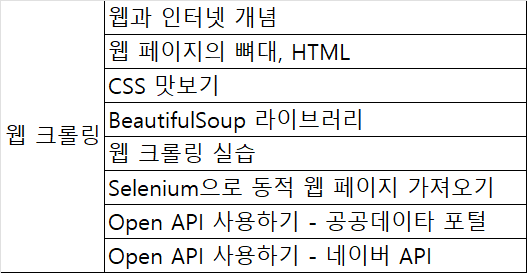

## Naver 검색 API 서비스

- 네이버 개발자센터 검색 -> https://developers.naver.com/main/
- Documents -> API 공통 가이드에 따라 실습 -> 비로그인 방식 오픈 API 방식 선택
- 상단 메뉴 중 Application -> 애플리케이션 등록 선택
- <애플리케이션 등록> 애플리케이션이름, 사용 API, 비로그인 오픈 API 서비스 환경 설정
- 등록된 API의 Client ID, Client Secret 따로 메모
- API 공통 가이드 샘플 소스 깃허브 소스 : https://github.com/naver/naver-openapi-guide



### 검색 API
 - <개발자센터 상단 메뉴> Documents -> 서비스 API -> 검색 선택
 - 블로그 검색 가이드 확인하기



- Client ID : DhjTWuVGyK58EfnmgsVs
- Client Secret : JElGvx9Qpo

In [ ]:
# [1] 네이버 검색 API 예제 - web 검색
import os
import sys
import urllib.request

client_id = "DhjTWuVGyK58EfnmgsVs"
client_secret = "JElGvx9Qpo"

encText = urllib.parse.quote("전주 맛집")

url = "https://openapi.naver.com/v1/search/webkr.xml?query=" + encText # XML 결과

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - webkr ::&apos;전주 맛집&apos;</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Sun, 19 May 2024 12:28:08 +0900</lastBuildDate><total>7479805</total><start>1</start><display>10</display><item><title>&apos;&lt;b&gt;전주&lt;/b&gt;&apos; &lt;b&gt;맛집&lt;/b&gt; 빅데이터 추천순위 Top100 - 다이닝코드</title><link>https://www.diningcode.com/list.dc?query=%EC%A0%84%EC%A3%BC</link><description>&apos;&lt;b&gt;전주&lt;/b&gt;&apos; &lt;b&gt;맛집&lt;/b&gt; 조점례 남문피순대 (국밥, ★4.1), 현대옥 남부시장점(콩나물국밥, ★4.5), 왱이집 (콩나물국밥, ★4) 등 6,250곳의 전체 순위,식당정보,방문자리뷰,사진 등을 확인하세요.</description></item><item><title>&lt;b&gt;전주 맛집&lt;/b&gt;/음식점 추천 순위 Best 10 - Tripadvisor</title><link>https://www.tripadvisor.co.kr/Restaurants-g1143545-Jeonju_Jeollabuk_do.html</link><description>음식으로 &lt;b&gt;전주&lt;/b&gt; 탐방하기 ; 아시아 요리 ; 카페 ; 펍 ; 중국 요리 ; 미국 요리 ; 피자 ; 퓨전 ; 일본 요리 ; 해산물 ; 이탈리아 요리</description></item><item><titl

In [ ]:
# [2] 검색어를 입력으로 받아서 처리
encText = urllib.parse.quote(input("검색어 입력:"))

In [ ]:
# [3] api 요청변수 채우기
display = 100  #한 번에 표시할 검색 결과 개수(기본값: 10, 최댓값: 100)
#검색 시작 위치(기본값: 1, 최댓값: 1000)
start   = 1
end     = 1000

In [ ]:
# [4] BeautifulSoup를 사용하여 xml 파일을 파싱
from bs4 import BeautifulSoup
soup = BeautifulSoup(response, 'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>



In [ ]:
# [1] 네이버 검색 API 예제 - web 검색
import os
import sys
import urllib.request
from bs4 import BeautifulSoup #[4] BeautifulSoup 추가
client_id = "DhjTWuVGyK58EfnmgsVs"
client_secret = "JElGvx9Qpo"

# [2] 검색어를 입력으로 받아서 처리
encText = urllib.parse.quote("컴퓨터")
# encText = urllib.parse.quote(input("검색어 입력:"))

# [3] api 요청변수 채우기
display = 20  #한 번에 표시할 검색 결과 개수(기본값: 10, 최댓값: 100)
#검색 시작 위치(기본값: 1, 최댓값: 1000)
start   = 1
end     = 1000

# url 만들기
url = "https://openapi.naver.com/v1/search/webkr.xml?query=" + encText + "&display=" +  str(display) + "&start=" + str(start)
print(url)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

response = urllib.request.urlopen(request)

rescode = response.getcode()
#오류코드 확인 후 결과 처리
if(rescode==200):
    # [4] BeautifulSoup를 사용하여 xml 파일을 파싱
    soup = BeautifulSoup(response, 'xml')
    print(soup.prettify())
else:
    print("Error Code:" + rescode)




https://openapi.naver.com/v1/search/webkr.xml?query=%EC%BB%B4%ED%93%A8%ED%84%B0&display=20&start=1
<?xml version="1.0" encoding="utf-8"?>
<rss version="2.0">
 <channel>
  <title>
   Naver Open API - webkr ::'컴퓨터'
  </title>
  <link>
   https://search.naver.com
  </link>
  <description>
   Naver Search Result
  </description>
  <lastBuildDate>
   Mon, 20 May 2024 09:42:22 +0900
  </lastBuildDate>
  <total>
   280254350
  </total>
  <start>
   1
  </start>
  <display>
   20
  </display>
  <item>
   <title>
    &lt;b&gt;컴퓨터&lt;/b&gt; - 위키백과 한국어
   </title>
   <link>
    https://ko.wikipedia.org/wiki/%EC%BB%B4%ED%93%A8%ED%84%B0
   </link>
   <description>
    &lt;b&gt;컴퓨터&lt;/b&gt; ( 영어: computer , 문화어: 콤퓨터 , 콤퓨타 , 순화어: 전산기(電算機), 셈틀 )는 방대한 정보(데이터)를 저장 하고 검색 하고 처리 하며, 프로그래밍이 가능한 전자적 기계 장치 또는 자동 으로 계산 (연산)을 수행하고 다른 기계장치(machines)들을 제어하는 전자 기기다. 프로그램을 사용해 정보 를 입...
   </description>
  </item>
  <item>
   <title>
    &lt;b&gt;컴퓨터&lt;/b&gt; - 나무위키
   </title>
   <link>
    https://namu.wiki/w/%

In [ ]:
# [5] XML파일에서 쓸모있는 데이터들은 모두 item태그에 있기 때문에 find_all 메서드를 사용하여 item태그를 가져옵니다.
item = soup.find_all('item')
# 총 데이타 확인
print(len(item))


20


In [ ]:
# 첫번째 데이타 확인
print(item[0])

<item><title>&lt;b&gt;컴퓨터&lt;/b&gt; - 위키백과 한국어</title><link>https://ko.wikipedia.org/wiki/%EC%BB%B4%ED%93%A8%ED%84%B0</link><description>&lt;b&gt;컴퓨터&lt;/b&gt; ( 영어: computer , 문화어: 콤퓨터 , 콤퓨타 , 순화어: 전산기(電算機), 셈틀 )는 방대한 정보(데이터)를 저장 하고 검색 하고 처리 하며, 프로그래밍이 가능한 전자적 기계 장치 또는 자동 으로 계산 (연산)을 수행하고 다른 기계장치(machines)들을 제어하는 전자 기기다. 프로그램을 사용해 정보 를 입...</description></item>


In [ ]:
# 두번째 데이타 확인
print(item[1])

<item><title>&lt;b&gt;컴퓨터&lt;/b&gt; - 나무위키</title><link>https://namu.wiki/w/%EC%BB%B4%ED%93%A8%ED%84%B0</link><description>Computer 이진법을 이용하여 논리 연산, 저장을 수행하는 전자 기계.</description></item>


In [ ]:
# [6] 반복문으로 전체 데이타 뽑아내기
# 반환값 중 필요한 칼럼 확인
# title : 웹 문서의 제목. 제목에서 검색어와 일치하는 부분은 <b> 태그로 감싸져 있습니다.
# link :  웹 문서의 URL
# description : 웹 문서의 내용을 요약한 패시지 정보. 패시지 정보에서 검색어와 일치하는 부분은 <b> 태그로 감싸져 있습니다.

for idx in range(0,len(item)):
    item_dict= {}
    item_dict['title'] = item[idx].find('title').text
    item_dict['link'] = item[idx].find('link').text
    item_dict['description'] = item[idx].find('description').text
    print(item_dict)


{'title': '<b>컴퓨터</b> - 위키백과 한국어', 'link': 'https://ko.wikipedia.org/wiki/%EC%BB%B4%ED%93%A8%ED%84%B0', 'description': '<b>컴퓨터</b> ( 영어: computer , 문화어: 콤퓨터 , 콤퓨타 , 순화어: 전산기(電算機), 셈틀 )는 방대한 정보(데이터)를 저장 하고 검색 하고 처리 하며, 프로그래밍이 가능한 전자적 기계 장치 또는 자동 으로 계산 (연산)을 수행하고 다른 기계장치(machines)들을 제어하는 전자 기기다. 프로그램을 사용해 정보 를 입...'}
{'title': '<b>컴퓨터</b> - 나무위키', 'link': 'https://namu.wiki/w/%EC%BB%B4%ED%93%A8%ED%84%B0', 'description': 'Computer 이진법을 이용하여 논리 연산, 저장을 수행하는 전자 기계.'}
{'title': '다나와 <b>컴퓨터</b>', 'link': 'https://www.danawa.com/pc/', 'description': '온라인 쇼핑몰, 오픈마켓, 소셜커머스, 백화점, 전문몰 등 전 상품 정보 가격비교 사이트, 비교하면 다나와'}
{'title': '<b>컴퓨터</b> - 현대Hmall', 'link': 'https://www.hmall.com/pd/dpa/searchSectItem?sectId=2731271', 'description': 'Hmall &gt; Hmall 카테고리 &gt; 노트북/PC/게임 &gt; <b>컴퓨터</b>'}
{'title': '다나와', 'link': 'https://www.danawa.com/', 'description': '가격비교 사이트. 가전, <b>컴퓨터</b>, 자동차, 노트북, 휴대폰, 아웃도어, 생활용품 등 실시간 가격비교 제공.'}
{'title': '분류:<b>컴퓨터</b> - 나무위키', 'link': 'https://namu.wiki/w/%EB%B6%84%EB%A

In [ ]:
# [7] Regular expression을 사용하여 <b> </b> 태그 제외
# https://docs.python.org/ko/3/library/re.html

import re
remove_tag = re.compile('<.*?>')

for idx in range(0,len(item)):
    title = re.sub(remove_tag,'',item[idx].find('title').text)
    link = item[idx].find('link').text
    description = re.sub(remove_tag,'',item[idx].find('description').text)
    print(title, link,description)



컴퓨터 - 위키백과 한국어 https://ko.wikipedia.org/wiki/%EC%BB%B4%ED%93%A8%ED%84%B0 컴퓨터 ( 영어: computer , 문화어: 콤퓨터 , 콤퓨타 , 순화어: 전산기(電算機), 셈틀 )는 방대한 정보(데이터)를 저장 하고 검색 하고 처리 하며, 프로그래밍이 가능한 전자적 기계 장치 또는 자동 으로 계산 (연산)을 수행하고 다른 기계장치(machines)들을 제어하는 전자 기기다. 프로그램을 사용해 정보 를 입...
컴퓨터 - 나무위키 https://namu.wiki/w/%EC%BB%B4%ED%93%A8%ED%84%B0 Computer 이진법을 이용하여 논리 연산, 저장을 수행하는 전자 기계.
다나와 컴퓨터 https://www.danawa.com/pc/ 온라인 쇼핑몰, 오픈마켓, 소셜커머스, 백화점, 전문몰 등 전 상품 정보 가격비교 사이트, 비교하면 다나와
컴퓨터 - 현대Hmall https://www.hmall.com/pd/dpa/searchSectItem?sectId=2731271 Hmall &gt; Hmall 카테고리 &gt; 노트북/PC/게임 &gt; 컴퓨터
다나와 https://www.danawa.com/ 가격비교 사이트. 가전, 컴퓨터, 자동차, 노트북, 휴대폰, 아웃도어, 생활용품 등 실시간 가격비교 제공.
PC - 나무위키 https://namu.wiki/w/PC 개인용 컴퓨터(Personal Computer). 주로 'PC'라는 약칭으로 부른다. 개인용 컴퓨터는 기업, 기관 및 소수의 전문가들이 독점하던 컴퓨터라는 도구를 일반 대중의 손에 전해줌으로써 정보화 사회의 기틀을 마련해준...
분류:컴퓨터 - 나무위키 https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%BB%B4%ED%93%A8%ED%84%B0 컴퓨터에 해당하는 378개 문서를 확인할 수 있습니다.
컴퓨터 본체 갤러리 - 커뮤니티 포털 디시인사이드 https://gall.dcinside.com/board/lis

In [ ]:
# [8] 출력 데이타 데이타 프레임으로 만들기

import pandas as pd
web_df = pd.DataFrame(columns = ("title","link","description"))


In [ ]:
# [8] 필요한 데이타만 뽑아서 데이타셋으로 만들기

import pandas as pd
web_df = pd.DataFrame(columns = ("title","link","description"))

for idx in range(0,len(item)):
    item_dict= {}
    item_dict['title'] = re.sub(remove_tag,'',item[idx].find('title').text)
    item_dict['link'] = item[idx].find('link').text
    item_dict['description'] = re.sub(remove_tag,'',item[idx].find('description').text)
    print(item_dict)

    item_df = pd.DataFrame(item_dict, index=[idx])
    web_df = pd.concat([web_df,item_df], ignore_index=True)




print(web_df)



{'title': '컴퓨터 - 위키백과 한국어', 'link': 'https://ko.wikipedia.org/wiki/%EC%BB%B4%ED%93%A8%ED%84%B0', 'description': '컴퓨터 ( 영어: computer , 문화어: 콤퓨터 , 콤퓨타 , 순화어: 전산기(電算機), 셈틀 )는 방대한 정보(데이터)를 저장 하고 검색 하고 처리 하며, 프로그래밍이 가능한 전자적 기계 장치 또는 자동 으로 계산 (연산)을 수행하고 다른 기계장치(machines)들을 제어하는 전자 기기다. 프로그램을 사용해 정보 를 입...'}
{'title': '컴퓨터 - 나무위키', 'link': 'https://namu.wiki/w/%EC%BB%B4%ED%93%A8%ED%84%B0', 'description': 'Computer 이진법을 이용하여 논리 연산, 저장을 수행하는 전자 기계.'}
{'title': '다나와 컴퓨터', 'link': 'https://www.danawa.com/pc/', 'description': '온라인 쇼핑몰, 오픈마켓, 소셜커머스, 백화점, 전문몰 등 전 상품 정보 가격비교 사이트, 비교하면 다나와'}
{'title': '컴퓨터 - 현대Hmall', 'link': 'https://www.hmall.com/pd/dpa/searchSectItem?sectId=2731271', 'description': 'Hmall &gt; Hmall 카테고리 &gt; 노트북/PC/게임 &gt; 컴퓨터'}
{'title': '다나와', 'link': 'https://www.danawa.com/', 'description': '가격비교 사이트. 가전, 컴퓨터, 자동차, 노트북, 휴대폰, 아웃도어, 생활용품 등 실시간 가격비교 제공.'}
{'title': 'PC - 나무위키', 'link': 'https://namu.wiki/w/PC', 'description': "개인용 컴퓨터(Personal Computer). 주로 'PC'라는 약칭으로 부른다. 개인용 컴

In [ ]:
# [9] csv 파일로 만들기
web_df.to_csv('naver.csv', index=False, encoding='cp949')


In [ ]:
# [1] 네이버 검색 API 예제 - web 검색 전체
import os
import sys
import urllib.request
from bs4 import BeautifulSoup #[4] BeautifulSoup 추가
import re  # [7] Regular expression을 사용
import pandas as pd #[8] 출력 데이타 데이타 프레임으로 만들기

client_id = "DhjTWuVGyK58EfnmgsVs"
client_secret = "JElGvx9Qpo"

# [2] 검색어를 입력으로 받아서 처리
# encText = urllib.parse.quote("컴퓨터")
encText = urllib.parse.quote(input("검색어 입력:"))

# [3] api 요청변수 채우기
display = 100  #한 번에 표시할 검색 결과 개수(기본값: 10, 최댓값: 100)
#검색 시작 위치(기본값: 1, 최댓값: 1000)
start   = 1
end     = 1000

#[8] 출력 데이타 데이타 프레임으로 만들기
web_df = pd.DataFrame(columns = ("title","link","description"))

# 1회 호출로 display 설정 값만큼씩 데이타씩 가져오기. 최대 1000
for start_index in range(start, end, display) :
    # url 만들기
    url = "https://openapi.naver.com/v1/search/webkr.xml?query=" + encText + "&display=" +  str(display) + "&start=" + str(start_index)
    # print(url)

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)

    response = urllib.request.urlopen(request)

    rescode = response.getcode()
    #오류코드 확인 후 결과 처리
    if(rescode==200):
        # [4] BeautifulSoup를 사용하여 xml 파일을 파싱
        soup = BeautifulSoup(response, 'xml')
        # [5] XML파일에서 모든 item 태그 데이타 모으기
        item = soup.find_all('item')
        # 총 데이타 확인
        # print(len(item))

        # [7] Regular expression을 사용하여 <b> </b> 태그 제외
        remove_tag = re.compile('<.*?>')

        for idx in range(0,len(item)):
            item_dict= {}
            item_dict['title'] = re.sub(remove_tag,'',item[idx].find('title').text)
            item_dict['link'] = item[idx].find('link').text
            item_dict['description'] = re.sub(remove_tag,'',item[idx].find('description').text)
            #print(item_dict)

            item_df = pd.DataFrame(item_dict, index=[start_index])
            web_df = pd.concat([web_df,item_df], ignore_index=True)
    else:
        print("Error Code:" + rescode)

# web_df 확인
print(web_df)

# [9] csv 파일로 만들기
# encoding='cp949' 한글깨짐
# encoding='euc-kr' 한글깨짐
# encoding='utf-8-sig'
web_df.to_csv('naver.csv', index=False, encoding='utf-8-sig')


검색어 입력:전주 맛집
                                          title  \
0              '전주' 맛집 빅데이터 추천순위 Top100 - 다이닝코드   
1         전주 맛집/음식점 추천 순위 Best 10 - Tripadvisor   
2                          전주맛집 맛집 인기검색 순위 - 식신   
3                          전주맛집 맛집 인기검색 순위 - 식신   
4            전북맛집 - 전주-덕진구맛집 추천 베스트10 | 식신 맛집추천   
..                                          ...   
195                      기타 - 전주음식 &gt; 콘텐츠 리스트   
196  전주맛집 온초담 by 초담불고기 (@chodam_story) | TikTok   
197                      전골 - 전주음식 &gt; 콘텐츠 리스트   
198                        지구를 구하는 채식 맛집 - 전주시청   
199              전주 토박이 맛집 블로거 쉐비체어의 추천 - 레이디경향   

                                                  link  \
0    https://www.diningcode.com/list.dc?query=%EC%A...   
1    https://www.tripadvisor.co.kr/Restaurants-g114...   
2    https://www.siksinhot.com/search?keywords=%EC%...   
3    https://www.siksinhot.com/search?keywords=%20%...   
4    https://www.siksinhot.com/taste?hpAreaId=358&u...   
..                        